＃ビュッフェ形式を再現してみる

In [3]:
#defining the libraries and the environment variables
import os
from dotenv import load_dotenv
from openai import OpenAI
import pandas as pd
import numpy as np
import re
import random

client = OpenAI(
    api_key=os.environ.get("OPENAI_API_KEY")
    )
pd.set_option('display.max_colwidth', None)

In [5]:
#define role
attribute_list = ["College student", "Graduate student", "College teacher"]
sex_list = ["male", "female"]
fisique_list = ["fat", "normal", "skinny"]


In [6]:
prompt="During a lunch break, you are in the college cafeteria where various meal options are available. Please choose your lunch.\n\
You don't have to choose from the entire menu.Please think about how much you eat and take the right amount.\n\
When responding, please consider each option independently to ensure your selection is based solely on your preference.\n\
Answer only the menu you chose.\n\
"

In [3]:
choice_1 = "Dynamite chili and tangy lime-seasoned beets"
choice_2 = "Beets"
choice_3 = "Lighter-choice beets with no added sugar"
choice_4 = "High-antioxidant beets"

choice_list = [choice_1, choice_2, choice_3, choice_4]

In [62]:
def generate_completion(role, choice, prompt):
    response = client.chat.completions.create(
        model="gpt-4-turbo-2024-04-09",
        #model="gpt-3.5-turbo-1106",
        messages=[
            {"role": "system", "content": role},
            {"role": "user", "content": f"{prompt},{choice}"}
        ],
        temperature=0.2,
        max_tokens=100,
        )
    return response

In [17]:
import random

class Buffet_UTokyo:
    def __init__(self):
        self.choice_1 = "Dynamite chili and tangy lime-seasoned beets"
        self.choice_2 = "Beets"
        self.choice_3 = "Lighter-choice beets with no added sugar"
        self.choice_4 = "High-antioxidant beets"
        self.choice_list = [self.choice_1, self.choice_2, self.choice_3, self.choice_4]

        self.class_1 = "Main dish"
        self.class_2 = "Side dish, Salad"
        self.class_3 = "Rice"
        self.class_4 = "Noodles"
        
        # Main dish
        self.food_1 = [
            "Deep-fried succulent chicken",#手仕込みジューシー唐揚げ
            "Hamburger steak with arrabbiata sauce",#スパイシートマトハンバーグ
        #    "Grilled chicken with salt-based sauce",#グリルチキン（塩だれ）
            "Salt-grilled mackerel"#さば塩焼き
        ]
        # Side dish, Salad
        self.food_2 = [
            "French fries Spicy",#フライドポテト（スパイシー）
        #    "Soft-boiled egg",#温泉たまご
            "Boiled spinach with dried bonito",#ほうれん草のおひたし
        #    "Boiled chopped okura",#オクラのおひたし
        #    "Soy sauce taste boiled dried daikon radish strips",#切り干し大根
        #    "Tuna salad (with boiled egg, wakame seaweed, and shredded cabbage)",#ツナサラダ
            "Macaroni and corn salad (with wakame seaweed and shredded cabbage)"#マカロニ＆コーンサラダ
        ]
        # Rice
        self.food_3 = [
            "(Small size) Rice",#ごはん(小)
            "(Medium size) Rice",#ごはん(中)
            "(Large size) Rice"#ごはん(大)
        ]
        # Noodles
        self.food_4 = [
            "Plain udon noodles",#かけうどん
            "Zaru soba cool soba noodles",#ざるそば
            "Ramen in soy-sauce flavored soup"#醤油ラーメン
        ]

    def generate_buffet_prompt(self):
        #random_choice = "Dynamite chili and tangy lime-seasoned beets"#random.choice(self.choice_list)
        #self.food_2.append(random_choice)

        # Shuffle each food category list to randomize their order
        random.shuffle(self.food_1)
        random.shuffle(self.food_2)
        random.shuffle(self.food_3)
        random.shuffle(self.food_4)

        
        buffet_prompt = f"{self.class_1}\n" + "\n".join(f"{idx+1}. {dish}" for idx, dish in enumerate(self.food_1)) + "\n" \
                         f"{self.class_2}\n" + "\n".join(f"{idx+1}. {dish}" for idx, dish in enumerate(self.food_2)) + "\n" \
                         f"{self.class_3}\n" + "\n".join(f"{idx+1}. {dish}" for idx, dish in enumerate(self.food_3)) + "\n" \
                         f"{self.class_4}\n" + "\n".join(f"{idx+1}. {dish}" for idx, dish in enumerate(self.food_4))
        
        return buffet_prompt

# Instance creation and function call
buffet = Buffet_UTokyo()

food_list = buffet.food_1 + buffet.food_2 + buffet.food_3 + buffet.food_4
print(food_list)
buffet_prompt = buffet.generate_buffet_prompt()
print(buffet_prompt)




['Deep-fried succulent chicken', 'Hamburger steak with arrabbiata sauce', 'Salt-grilled mackerel', 'French fries Spicy', 'Boiled spinach with dried bonito', 'Macaroni and corn salad (with wakame seaweed and shredded cabbage)', '(Small size) Rice', '(Medium size) Rice', '(Large size) Rice', 'Plain udon noodles', 'Zaru soba cool soba noodles', 'Ramen in soy-sauce flavored soup']
Main dish
1. Salt-grilled mackerel
2. Deep-fried succulent chicken
3. Hamburger steak with arrabbiata sauce
Side dish, Salad
1. Macaroni and corn salad (with wakame seaweed and shredded cabbage)
2. French fries Spicy
3. Boiled spinach with dried bonito
Rice
1. (Large size) Rice
2. (Medium size) Rice
3. (Small size) Rice
Noodles
1. Plain udon noodles
2. Zaru soba cool soba noodles
3. Ramen in soy-sauce flavored soup


In [35]:
words_list = ["apple", "banana", "cherry"]
text = "I ate an apple and a banana today, but I didn't see any."

# 各単語の出現回数をカウント
def count_words(text, words_list):
    counts = {word: text.count(word) for word in words_list}
    food_selected = []

    # 結果を表示
    for food, count in counts.items():
        if count > 0:
            food_selected.append(food)
            break
    return food_selected

# 関数を実行
vegetable_selected = count_words(text, words_list)
print(vegetable_selected)

['apple']


In [37]:


def buffet_vegetable_preference(role,prompt,range_number):
    global food_list

    df = pd.DataFrame()

    for i in range(range_number):

        buffet_prompt = buffet.generate_buffet_prompt()

        response = generate_completion(role, buffet_prompt, prompt)
        content = response.choices[0].message.content

        #extract number from responce
        counts = {food: content.count(food) for food in food_list}


        df_sample = pd.DataFrame({"attribute":role,"response":content,"number":[counts]},index=[0])

        df = pd.concat([df,df_sample],ignore_index=True)
    return df


In [12]:
from collections import Counter
def count_number(df):
    result_dict = Counter()
    for i in range(len(df)):
        dic_1 = df["number"][i]
        # Update the result counter by adding counts from the current dictionary
        result_dict.update(dic_1)
    return result_dict

In [13]:
import matplotlib.pyplot as plt

def plot_bar(result_dict):
    # Creating a bar plot
    plt.figure(figsize=(10, 5))  # Set the figure size (optional)
    plt.bar(result_dict.keys(), result_dict.values(), color='blue')  # Create a bar plot

    plt.xlabel('Keys')  # Label on X-axis
    plt.ylabel('Counts')  # Label on Y-axis
    plt.title('Bar plot of Result Dictionary')  # Title of the plot

    plt.xticks(rotation=270)  # Rotate x-axis labels for better visibility if required
    plt.grid(True)  # Add a grid for better readability
    plt.show()  # Display the plot

<class 'collections.Counter'>


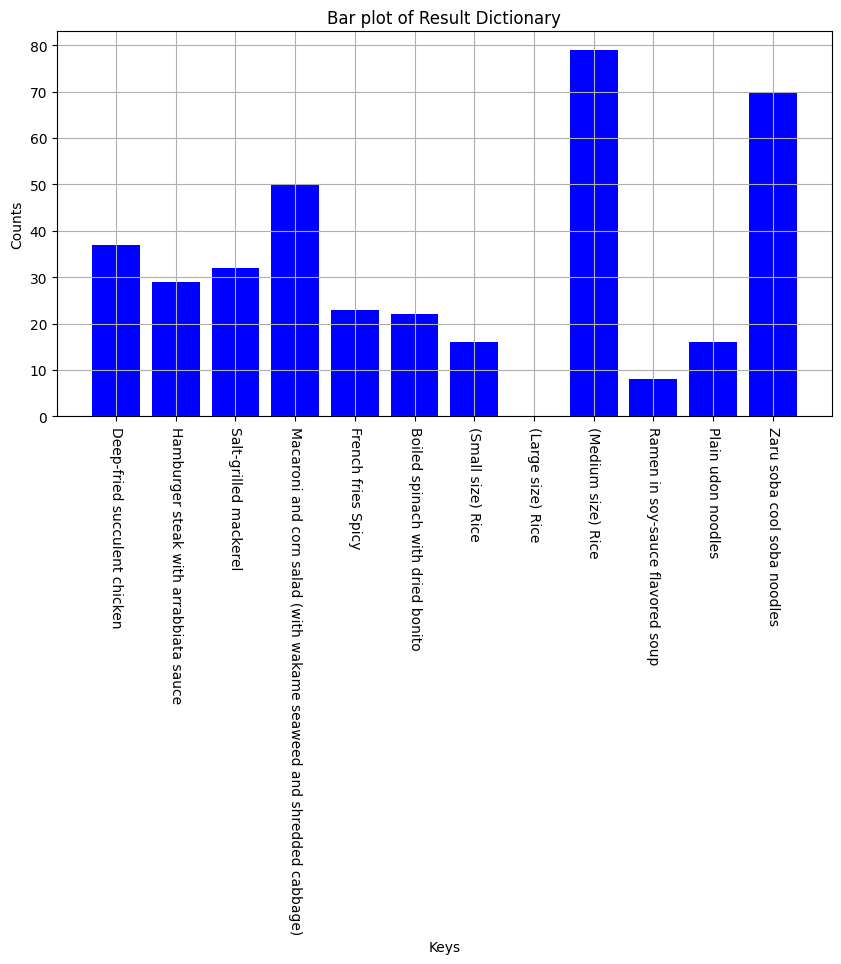

In [14]:
df_1 = buffet_vegetable_preference(prompt,100) 
df_1.head()
dict_1 = count_number(df_1)
print(type(dict_1))

plot_bar(dict_1)

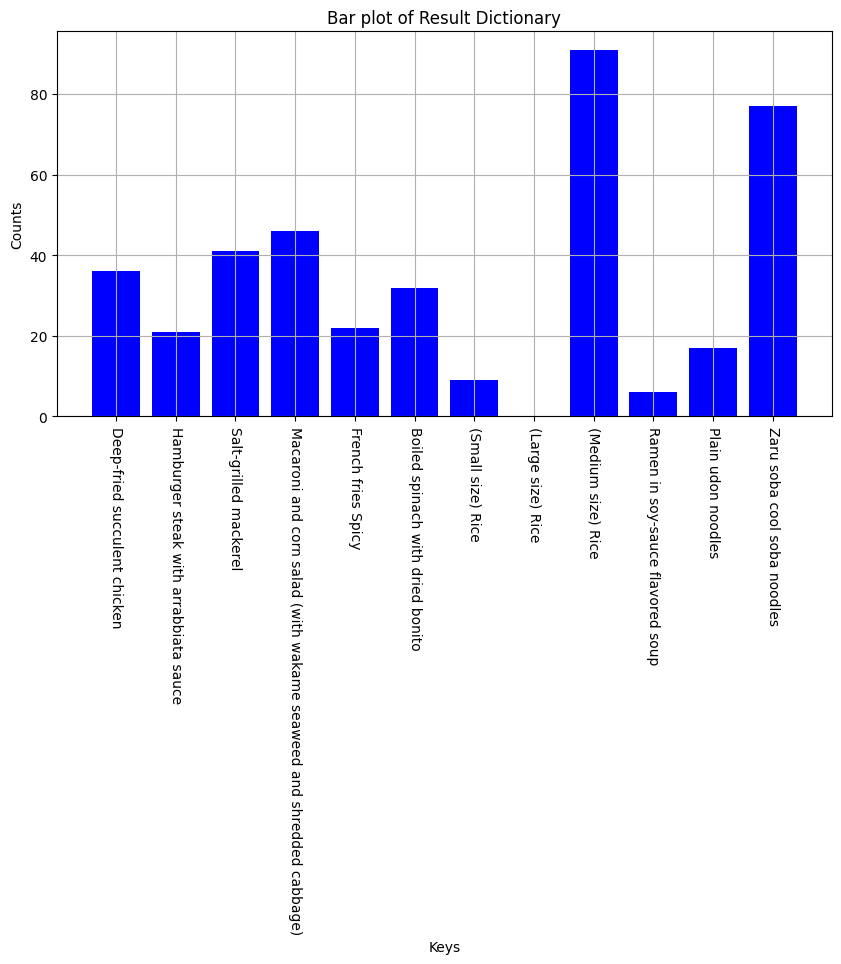

In [15]:
df_2 = buffet_vegetable_preference(prompt,100)

dict_2 = count_number(df_2)

plot_bar(dict_2)


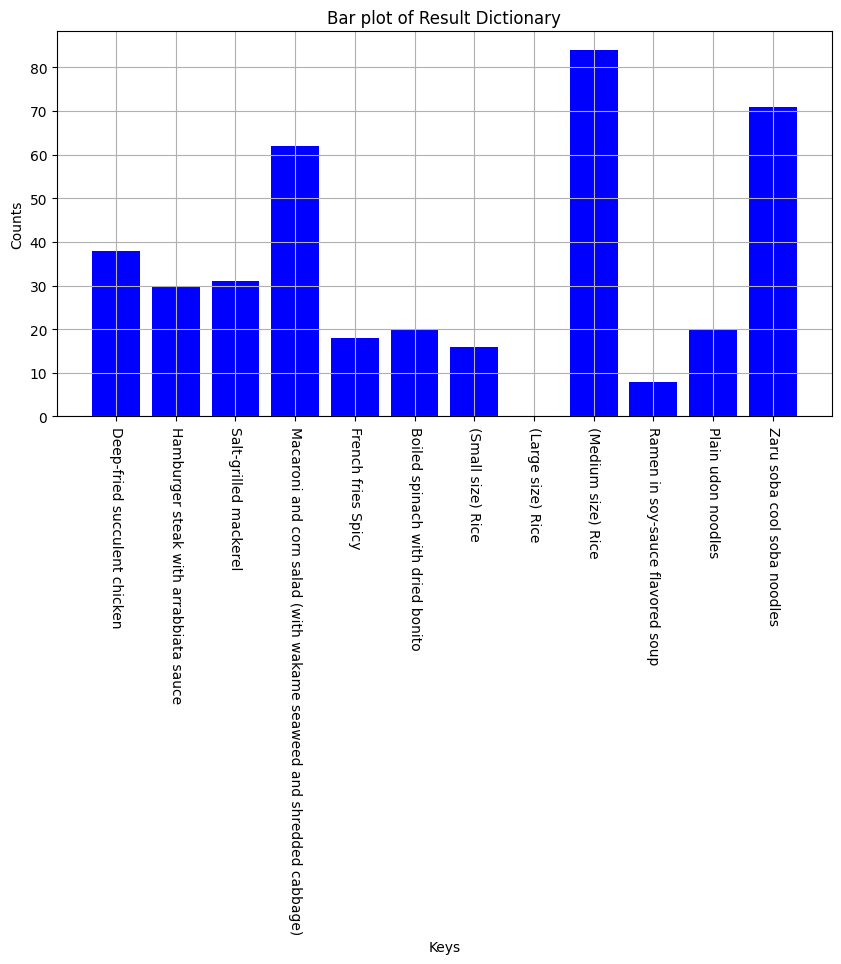

In [16]:
df_3 = buffet_vegetable_preference(prompt,100)
df_3.head()
result_dict_3 = count_number(df_3)
plot_bar(result_dict_3)

In [21]:
# 並び替えの関数
def sort_dict_by_keys(data, order_list):
    # 新しい辞書を order_list の順序に基づいて作成
    sorted_data = {key: data[key] for key in order_list if key in data}
    return sorted_data

# 並び替えた辞書を取得
dict_1 = sort_dict_by_keys(dict_1, food_list)

dict_2 = sort_dict_by_keys(dict_2, food_list)

dict_3 = sort_dict_by_keys(result_dict_3, food_list)


In [22]:
print(dict_1)

{'Deep-fried succulent chicken': 37, 'Hamburger steak with arrabbiata sauce': 29, 'Salt-grilled mackerel': 32, 'French fries Spicy': 23, 'Boiled spinach with dried bonito': 22, 'Macaroni and corn salad (with wakame seaweed and shredded cabbage)': 50, '(Small size) Rice': 16, '(Medium size) Rice': 79, '(Large size) Rice': 0, 'Plain udon noodles': 16, 'Zaru soba cool soba noodles': 70, 'Ramen in soy-sauce flavored soup': 8}


                                                                         Mean   
Deep-fried succulent chicken                                        37.000000  \
Hamburger steak with arrabbiata sauce                               26.666667   
Salt-grilled mackerel                                               34.666667   
French fries Spicy                                                  21.000000   
Boiled spinach with dried bonito                                    24.666667   
Macaroni and corn salad (with wakame seaweed and shredded cabbage)  52.666667   
(Small size) Rice                                                   13.666667   
(Medium size) Rice                                                  84.666667   
(Large size) Rice                                                    0.000000   
Plain udon noodles                                                  17.666667   
Zaru soba cool soba noodles                                         72.666667   
Ramen in soy-sauce flavored 

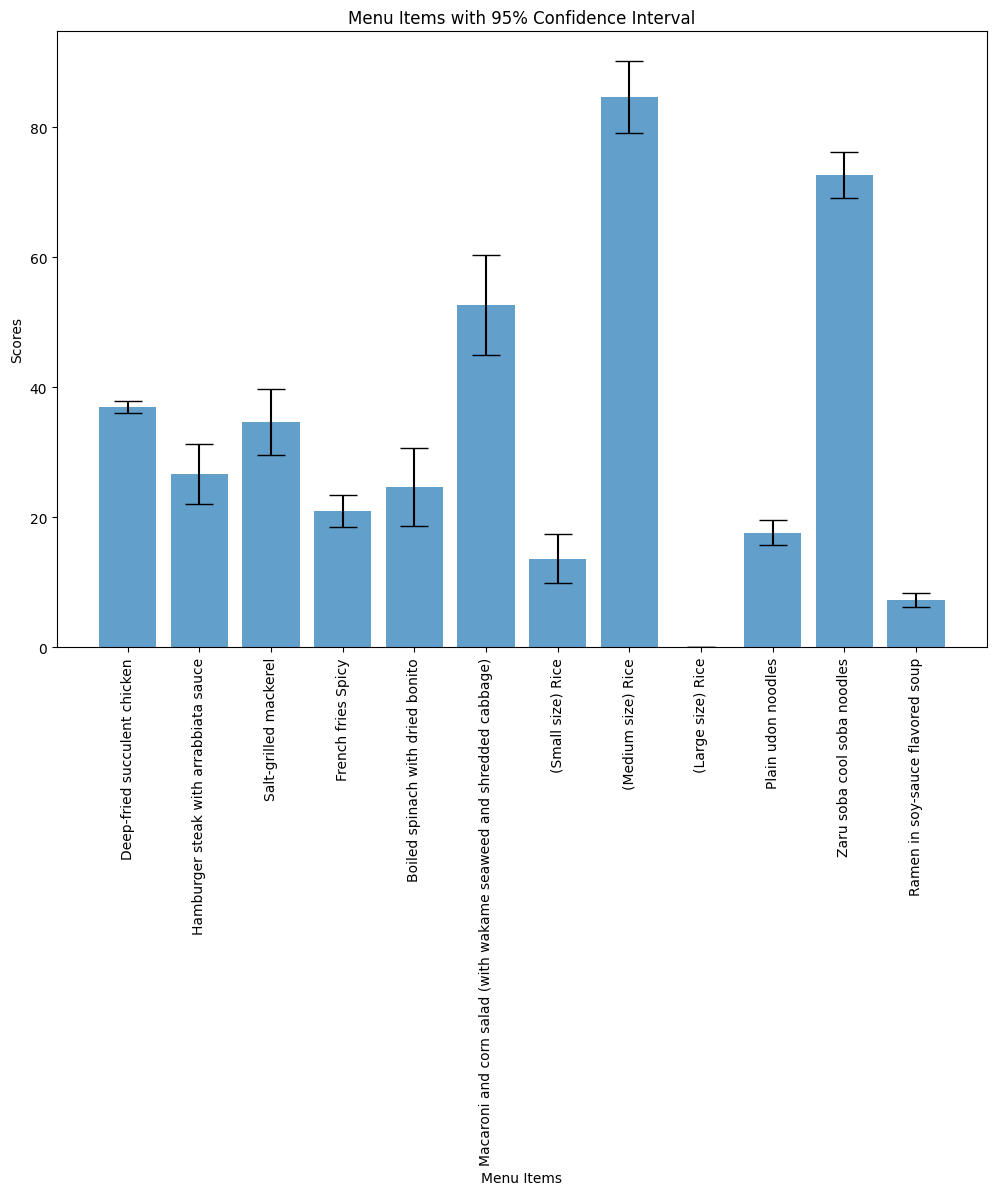

In [25]:
# すべてのキーを取得します
keys = list(dict_1.keys())

# すべての辞書の値を配列にまとめます
values = np.array([[dict_1[key], dict_2[key], dict_3[key]] for key in keys])

# 平均値を計算します
mean_values = np.mean(values, axis=1)
std_values = np.std(values, axis=1)

# 95%信頼区間を計算します
confidence_interval = 1.96 * np.std(values, axis=1) / np.sqrt(values.shape[1])

lower_bounds = mean_values - confidence_interval
upper_bounds = mean_values + confidence_interval

results = pd.DataFrame({
    'Mean': mean_values,
    'Standard': std_values,
    'Lower Bound (95% CI)': lower_bounds,
    'Upper Bound (95% CI)': upper_bounds
},  columns=keys)

print(results)
# プロット
x_pos = np.arange(len(keys))

plt.figure(figsize=(12, 8))
plt.bar(x_pos, mean_values, yerr=confidence_interval, align='center', alpha=0.7, capsize=10)
plt.xticks(x_pos, keys, rotation='vertical')
plt.xlabel('Menu Items')
plt.ylabel('Scores')
plt.title('Menu Items with 95% Confidence Interval')
plt.show()

In [33]:
results = pd.DataFrame({
    'Mean': mean_values,
    'Standard': std_values,
    'Lower Bound (95% CI)': lower_bounds,
    'Upper Bound (95% CI)': upper_bounds
},  index=keys).T
display(results)

,Deep-fried succulent chicken,Hamburger steak with arrabbiata sauce,Salt-grilled mackerel,French fries Spicy,Boiled spinach with dried bonito,Macaroni and corn salad (with wakame seaweed and shredded cabbage),(Small size) Rice,(Medium size) Rice,(Large size) Rice,Plain udon noodles,Zaru soba cool soba noodles,Ramen in soy-sauce flavored soup
Mean,37.000000,26.666667,34.666667,21.000000,24.666667,52.666667,13.666667,84.666667,0.0,17.666667,72.666667,7.333333
Standard,0.816497,4.027682,4.496913,2.160247,5.249339,6.798693,3.299832,4.921608,0.0,1.699673,3.091206,0.942809
Lower Bound (95% CI),36.076047,22.108915,29.577931,18.555451,18.726481,44.973222,9.932556,79.097343,0.0,15.743305,69.168638,6.266444
Upper Bound (95% CI),37.923953,31.224418,39.755402,23.444549,30.606852,60.360112,17.400778,90.235990,0.0,19.590028,76.164696,8.400222


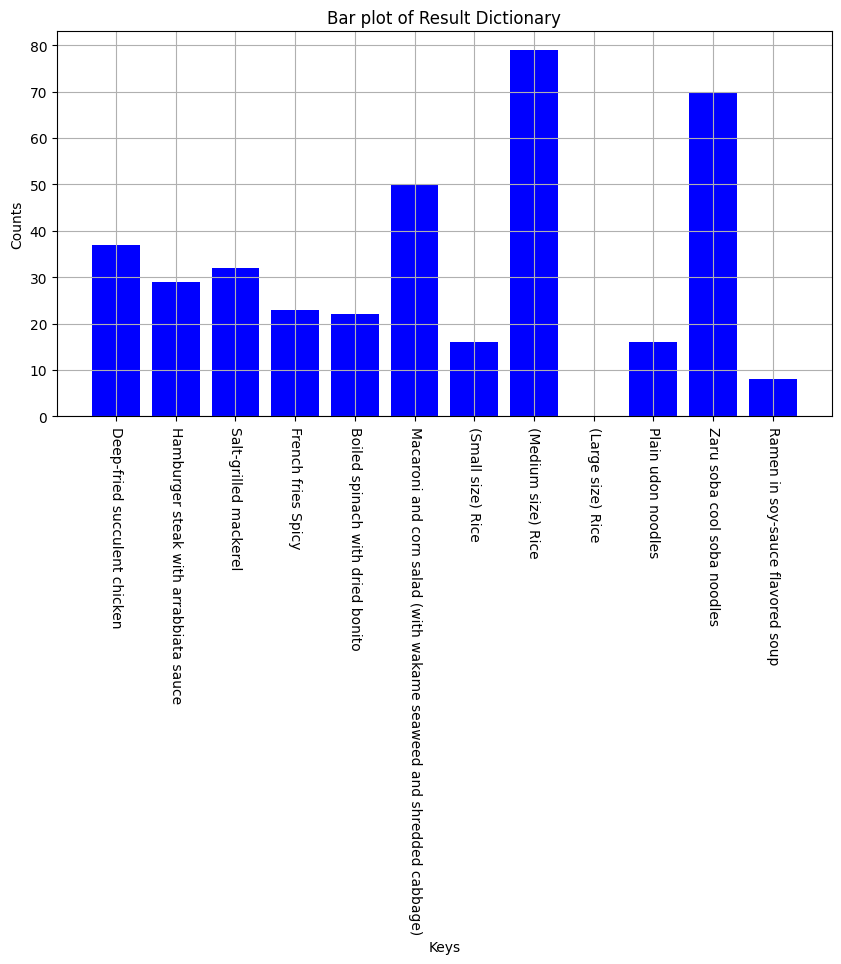

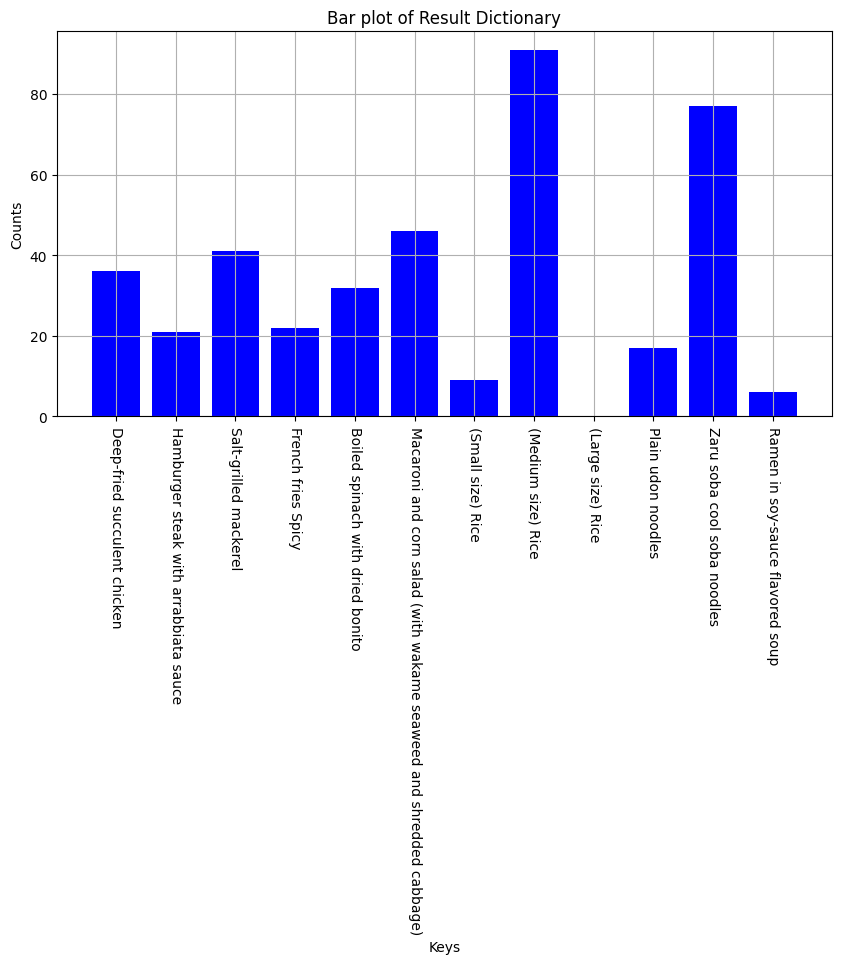

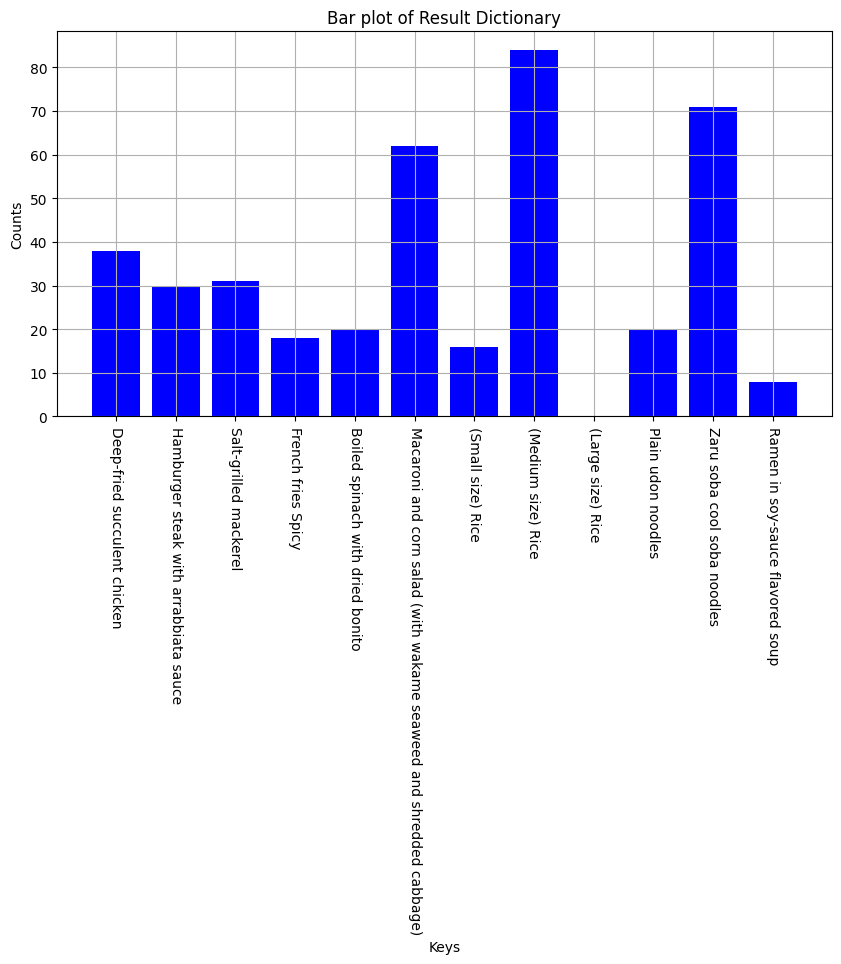

In [34]:
plot_bar(dict_1)
plot_bar(dict_2)
plot_bar(dict_3)

In [39]:
role_1 = "You are Twenties."
role_2 = "You are Sixties."

dataframes = {}
#generate buffet vegetable preference for 3 times
for i in range(3):
    df = buffet_vegetable_preference(role_1,prompt,100)
    file_name = f'df_Twenties_{i}.csv'  # ファイル名にインデックスを含める
    df.to_csv(file_name, index=False)
    print(f'{file_name} saved.')
    variable_name = f'df_Twenties_{i}'  # 変数名にインデックスを含める
    dataframes[variable_name] = count_number(df)

print("done")

df_Twenties_0.csv saved.
df_Twenties_1.csv saved.
df_Twenties_2.csv saved.
done


In [48]:
def make_buffet_several_times(role, prompt,batch,range_number):
    dataframes_list = []
    #generate buffet vegetable preference for 3 times
    for i in range(range_number):
        df = buffet_vegetable_preference(role,prompt,batch)
        file_name = f'df_{role}_{i}.csv'  # ファイル名にインデックスを含める
        df.to_csv(file_name, index=False)
        print(f'{file_name} saved.')
        dataframes_list.append(count_number(df))
    return dataframes_list

dataframes_2 = make_buffet_several_times(role_2,prompt,100,3)
print(dataframes_2)

df_You are Sixties._0.csv saved.
df_You are Sixties._1.csv saved.
df_You are Sixties._2.csv saved.
[Counter({'(Medium size) Rice': 80, 'Zaru soba cool soba noodles': 76, 'Macaroni and corn salad (with wakame seaweed and shredded cabbage)': 49, 'Salt-grilled mackerel': 38, 'Deep-fried succulent chicken': 34, 'Boiled spinach with dried bonito': 32, 'Hamburger steak with arrabbiata sauce': 26, '(Small size) Rice': 20, 'Plain udon noodles': 20, 'French fries Spicy': 19, 'Ramen in soy-sauce flavored soup': 3, '(Large size) Rice': 0}), Counter({'(Medium size) Rice': 90, 'Zaru soba cool soba noodles': 89, 'Macaroni and corn salad (with wakame seaweed and shredded cabbage)': 58, 'Salt-grilled mackerel': 49, 'Boiled spinach with dried bonito': 33, 'Deep-fried succulent chicken': 27, 'Hamburger steak with arrabbiata sauce': 20, '(Small size) Rice': 9, 'French fries Spicy': 8, 'Plain udon noodles': 7, 'Ramen in soy-sauce flavored soup': 3, '(Large size) Rice': 0}), Counter({'(Medium size) Rice': 

In [35]:
df_1.to_csv('df_baseline_1.csv', index=False)
df_2.to_csv('df_baseline_2.csv', index=False)
df_3.to_csv('df_baseline_3.csv', index=False)

In [60]:
def draw_barplot_with_cd(dic,lis):
    global food_list
    # すべてのキーを取得します
    keys = list(food_list)

    dic_list = list(dic.values())
    dict_1 = dic_list[0]
    dict_2 = dic_list[1]
    dict_3 = dic_list[2]

    # すべての辞書の値を配列にまとめます
    values = np.array([[
                dict_1[key], dict_2[key], dict_3[key]
                ] for key in keys])

    # 平均値を計算します
    mean_values = np.mean(values, axis=1)
    std_values = np.std(values, axis=1)

    # 95%信頼区間を計算します
    confidence_interval = 1.96 * np.std(values, axis=1) / np.sqrt(values.shape[1])

    lower_bounds = mean_values - confidence_interval
    upper_bounds = mean_values + confidence_interval

    results = pd.DataFrame({
    'Mean': mean_values,
    'Standard': std_values,
    'Lower Bound (95% CI)': lower_bounds,
    'Upper Bound (95% CI)': upper_bounds
    },  index=keys).T

    display(results)

    dict_1 = lis[0]
    dict_2 = lis[1]
    dict_3 = lis[2]

    # すべての辞書の値を配列にまとめます
    values_2 = np.array([[
                dict_1[key], dict_2[key], dict_3[key]
                ] for key in keys])

    # 平均値を計算します
    mean_values_2 = np.mean(values_2, axis=1)
    std_values_2 = np.std(values_2, axis=1)

    # 95%信頼区間を計算します
    confidence_interval_2 = 1.96 * np.std(values_2, axis=1) / np.sqrt(values_2.shape[1])

    lower_bounds_2 = mean_values_2 - confidence_interval_2
    upper_bounds_2 = mean_values_2 + confidence_interval_2

    results_2 = pd.DataFrame({
    'Mean': mean_values_2,
    'Standard': std_values_2,
    'Lower Bound (95% CI)': lower_bounds_2,
    'Upper Bound (95% CI)': upper_bounds_2
    },  index=keys).T

    display(results_2)  
    # プロット
    x_pos = np.arange(len(keys))

    plt.figure(figsize=(12, 8))
    plt.bar(x_pos, mean_values, yerr=confidence_interval, label = "20",fc = "blue",align='edge',width=-0.3,alpha=0.7, capsize=10)
    plt.bar(x_pos, mean_values_2, yerr=confidence_interval_2, label="60",fc = "orange",align='edge',width=0.3, alpha=0.7, capsize=10)
    plt.xticks(x_pos, keys, rotation=270)
    plt.legend()
    plt.xlabel('Menu Items')
    plt.ylabel('Scores')
    plt.title('Menu Items with 95% Confidence Interval')
    plt.show()

,Deep-fried succulent chicken,Hamburger steak with arrabbiata sauce,Salt-grilled mackerel,French fries Spicy,Boiled spinach with dried bonito,Macaroni and corn salad (with wakame seaweed and shredded cabbage),(Small size) Rice,(Medium size) Rice,(Large size) Rice,Plain udon noodles,Zaru soba cool soba noodles,Ramen in soy-sauce flavored soup
Mean,39.333333,28.000000,31.666667,20.666667,23.666667,55.000000,7.666667,91.666667,0.0,13.666667,79.666667,5.666667
Standard,4.496913,0.816497,2.494438,3.858612,3.299832,1.414214,1.699673,1.247219,0.0,2.054805,2.867442,0.471405
Lower Bound (95% CI),34.244598,27.076047,28.843944,16.300236,19.932556,53.399667,5.743305,90.255305,0.0,11.341436,76.421851,5.133222
Upper Bound (95% CI),44.422069,28.923953,34.489389,25.033098,27.400778,56.600333,9.590028,93.078028,0.0,15.991897,82.911482,6.200111


,Deep-fried succulent chicken,Hamburger steak with arrabbiata sauce,Salt-grilled mackerel,French fries Spicy,Boiled spinach with dried bonito,Macaroni and corn salad (with wakame seaweed and shredded cabbage),(Small size) Rice,(Medium size) Rice,(Large size) Rice,Plain udon noodles,Zaru soba cool soba noodles,Ramen in soy-sauce flavored soup
Mean,28.000000,23.333333,46.333333,13.333333,35.666667,50.666667,14.000000,85.666667,0.0,14.000000,80.666667,4.000000
Standard,4.546061,2.494438,6.018490,4.496913,4.496913,5.436502,4.546061,4.189935,0.0,5.354126,5.906682,1.414214
Lower Bound (95% CI),22.855648,20.510611,39.522771,8.244598,30.577931,44.514685,8.855648,80.925309,0.0,7.941236,73.982627,2.399667
Upper Bound (95% CI),33.144352,26.156056,53.143896,18.422069,40.755402,56.818648,19.144352,90.408024,0.0,20.058764,87.350706,5.600333


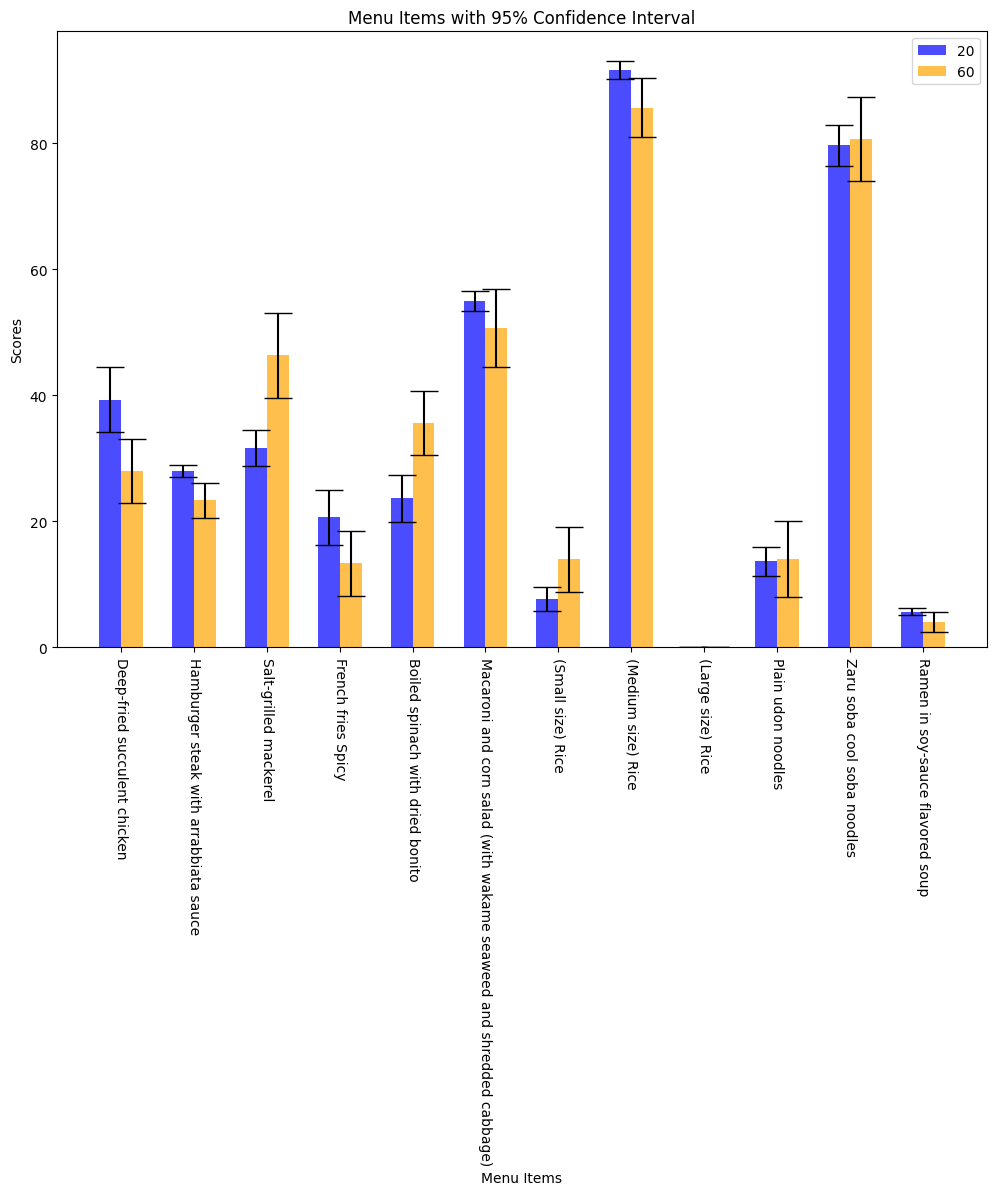

In [61]:
draw_barplot_with_cd(dataframes,dataframes_2)

In [50]:
def draw_barplot_with_cd_2(a:list):
    global food_list
    # すべてのキーを取得します
    keys = list(food_list)

    dict_1 = a[0]
    dict_2 = a[1]
    dict_3 = a[2]

    # すべての辞書の値を配列にまとめます
    values = np.array([[
                dict_1[key], dict_2[key], dict_3[key]
                ] for key in keys])

    # 平均値を計算します
    mean_values = np.mean(values, axis=1)
    std_values = np.std(values, axis=1)

    # 95%信頼区間を計算します
    confidence_interval = 1.96 * np.std(values, axis=1) / np.sqrt(values.shape[1])

    lower_bounds = mean_values - confidence_interval
    upper_bounds = mean_values + confidence_interval

    results = pd.DataFrame({
    'Mean': mean_values,
    'Standard': std_values,
    'Lower Bound (95% CI)': lower_bounds,
    'Upper Bound (95% CI)': upper_bounds
    },  index=keys).T

    display(results)
    # プロット
    x_pos = np.arange(len(keys))

    plt.figure(figsize=(12, 8))
    plt.bar(x_pos, mean_values, yerr=confidence_interval, align='center', alpha=0.7, capsize=10)
    plt.xticks(x_pos, keys, rotation='vertical')
    plt.xlabel('Menu Items')
    plt.ylabel('Scores')
    plt.title('Menu Items with 95% Confidence Interval')
    plt.show()

,Deep-fried succulent chicken,Hamburger steak with arrabbiata sauce,Salt-grilled mackerel,French fries Spicy,Boiled spinach with dried bonito,Macaroni and corn salad (with wakame seaweed and shredded cabbage),(Small size) Rice,(Medium size) Rice,(Large size) Rice,Plain udon noodles,Zaru soba cool soba noodles,Ramen in soy-sauce flavored soup
Mean,28.000000,23.333333,46.333333,13.333333,35.666667,50.666667,14.000000,85.666667,0.0,14.000000,80.666667,4.000000
Standard,4.546061,2.494438,6.018490,4.496913,4.496913,5.436502,4.546061,4.189935,0.0,5.354126,5.906682,1.414214
Lower Bound (95% CI),22.855648,20.510611,39.522771,8.244598,30.577931,44.514685,8.855648,80.925309,0.0,7.941236,73.982627,2.399667
Upper Bound (95% CI),33.144352,26.156056,53.143896,18.422069,40.755402,56.818648,19.144352,90.408024,0.0,20.058764,87.350706,5.600333


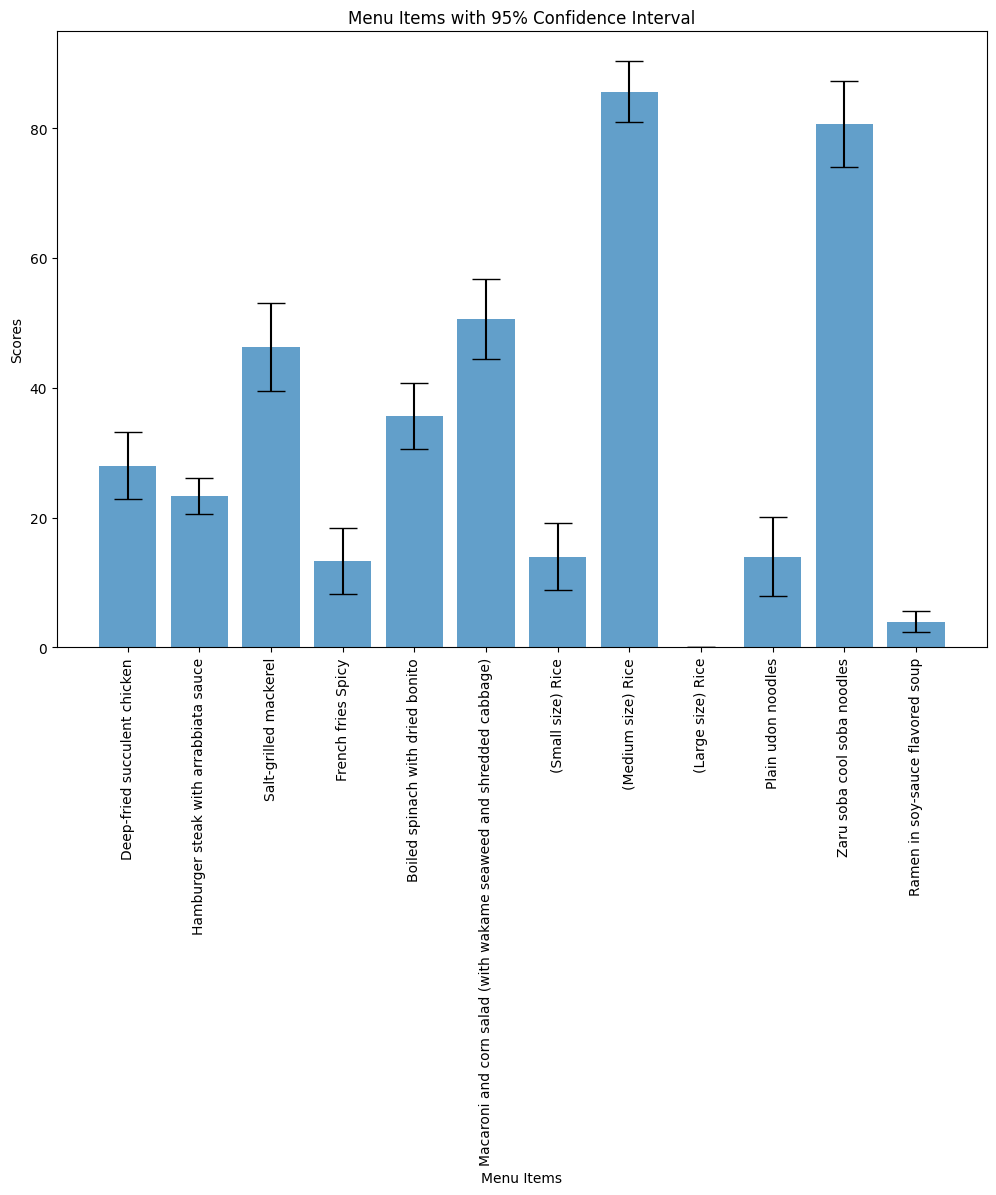

In [51]:
draw_barplot_with_cd_2(dataframes_2)

,Deep-fried succulent chicken,Hamburger steak with arrabbiata sauce,Salt-grilled mackerel,French fries Spicy,Boiled spinach with dried bonito,Macaroni and corn salad (with wakame seaweed and shredded cabbage),(Small size) Rice,(Medium size) Rice,(Large size) Rice,Plain udon noodles,Zaru soba cool soba noodles,Ramen in soy-sauce flavored soup
Mean,39.333333,28.000000,31.666667,20.666667,23.666667,55.000000,7.666667,91.666667,0.0,13.666667,79.666667,5.666667
Standard,4.496913,0.816497,2.494438,3.858612,3.299832,1.414214,1.699673,1.247219,0.0,2.054805,2.867442,0.471405
Lower Bound (95% CI),34.244598,27.076047,28.843944,16.300236,19.932556,53.399667,5.743305,90.255305,0.0,11.341436,76.421851,5.133222
Upper Bound (95% CI),44.422069,28.923953,34.489389,25.033098,27.400778,56.600333,9.590028,93.078028,0.0,15.991897,82.911482,6.200111


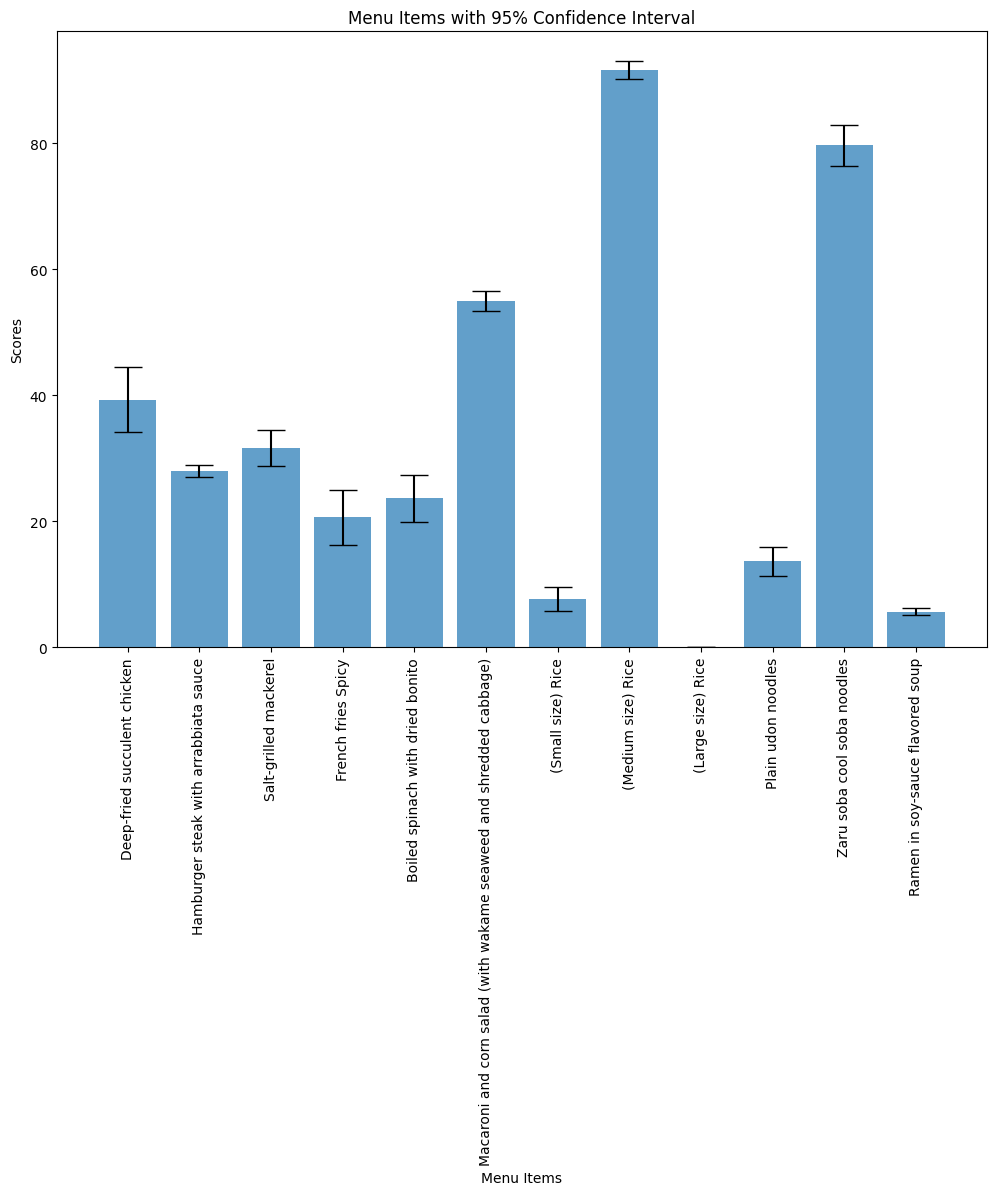

In [45]:
draw_barplot_with_cd(dataframes)